In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize
import matplotlib.cm as cm

In [2]:
df = pd.read_csv('dressler.csv')

In [5]:
df = pd.DataFrame(df)

In [94]:
df['MType']

0       
1       
2       
3       
4       
      ..
672     
673     
674     
675     
676     
Name: MType, Length: 677, dtype: object

In [28]:
#Separo en field y cluster
campo = np.where(df['Mm'] == 'f')[0]
field = df.iloc[campo]

cumulo = np.where(df['Mm'] == 'c')[0]
cluster = df.iloc[cumulo]


In [45]:
#Selecciono galaxias que solo tengan tipo morfologico disponible
f_morphology = np.where(field['MType'] != ' ')[0]
field = field.iloc[f_morphology]

f2_morphology = np.where(cluster['MType'] != ' ')[0]
cluster = cluster.iloc[f2_morphology]

In [60]:
#Selecciono galaxias con valores validos para Hdelta y OII
f_values= np.where((field['[OII]'] != 0) & (field['Hdelta'] != 0))[0]
field = field.iloc[f_values]

f2_values = np.where((cluster['[OII]'] != 0) & (cluster['Hdelta'] != 0))[0]
cluster = cluster.iloc[f2_values]

In [104]:
# Definir colores para cada tipo morfológico
cmap = mpl.colormaps['jet']
categories = df['MType'].unique()
colors = [cmap(i / len(categories)) for i in range(len(categories))]
norm = Normalize(vmin=0, vmax=len(categories) - 1)
scalar_map = cm.ScalarMappable(norm=norm, cmap=cmap)


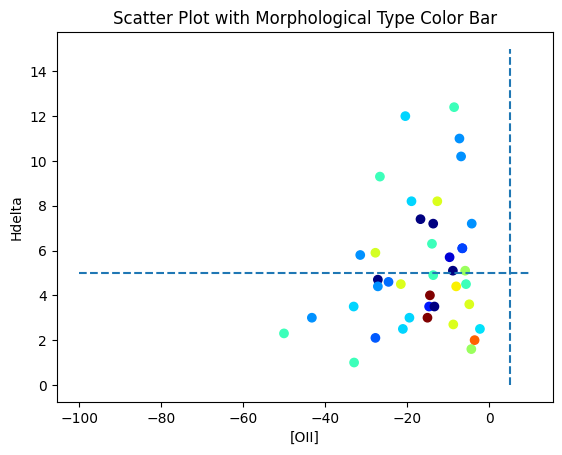

In [107]:
plt.scatter(field['[OII]'],field['Hdelta'], c=[categories.tolist().index(mtype) for mtype in field['MType']], cmap=cmap)
plt.scatter(cluster['[OII]'], cluster['Hdelta'], c=[categories.tolist().index(mtype) for mtype in cluster['MType']], cmap=cmap)
plt.hlines(5, -100, 10, linestyles='dashed')
plt.vlines(5, 0, 15, linestyles='dashed')

plt.xlabel('[OII]')
plt.ylabel('Hdelta')
plt.title('Scatter Plot with Morphological Type Color Bar')


plt.show()

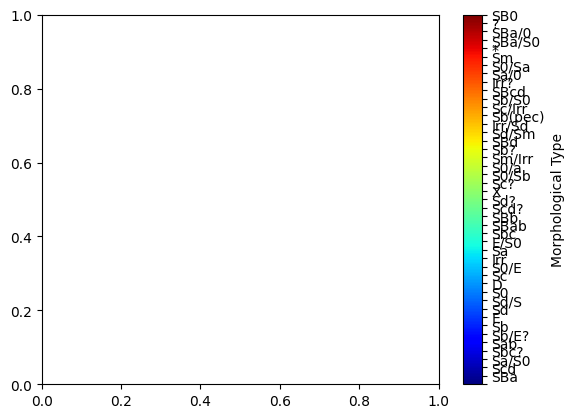

In [108]:
cbar = plt.colorbar(scalar_map, ax=plt.gca())  # Especificar el eje actual como el lugar para la barra de colores
cbar.set_ticks(np.arange(len(categories)))
cbar.set_ticklabels(categories)
cbar.set_label('Morphological Type')
